# Лабораторная работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования
Выполнили студенты гр. 9303 Павлов Дмитрий и Скворчевский Богдан. Вариант №10

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на формулах численного дифференцирования и интегрирования. Полученные результаты содержательно проинтерпретировать.

## Основные теоретические положения

Дискретный сигнал $\displaystyle x_0, \dots, x_{N-1}$, как правило, получается при дискретизации аналогового (определённого во все моменты времени) сигнала $\displaystyle s(t)$

Дискретное преобразование Фурье. Так как $\displaystyle s(t)$ переодическая функция, то её можно разложить в ряд Фурье, коэффициенты которого вычисляются по формуле:

$$\displaystyle X(n)=\dfrac{1}{NT}\int_0^{NT}s(t)\cdot e^{-i\omega_nt}\mathrm{d}x \\ X(n) = \sum_{k=0}^{N-1}x_ke^{-i\frac{2\pi nk}{N}} , где  \displaystyle n = 0,1,\dots,N-1$$

Линейное преобразование по 5 точкам: $H_5 (\omega) = \frac15 (1 + 2\cos\omega + 2\cos{2\omega})$

Линейное преобразование по 9 точкам: $H_9(\omega) = \frac15 (1 + 2\cos\omega + 2\cos{2\omega} + 2\cos{3\omega} + 2\cos{4\omega})$

## Выполнение работы

1. Сформировать дискретный сигнал посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k cos(\omega_kt+\varphi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от $0$ до $\pi$, изменяющимися с шагом $\Delta\omega=0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от $1$ до $11$, определяемые случайным образом с помощью датчика равномерно распределённых случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от $0$ до $0.5$. Дискретная последовательность должна включать в себя $32$ отсчёта ($N=31$).

In [224]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.fftpack import fft

In [225]:
def get_stem_plot(x, title, y=None):
    if y is not None:
        plt.stem(x, y)
    else:
        plt.stem(x)
    plt.title(title)
    plt.show()

def get_analog_signal(n):
    x = np.linspace(0, n, 1024)
    omegas = np.arange(0, np.pi + 0.1 * np.pi, 0.1 * np.pi)
    A_coeffs = np.random.randint(1, 11, 11)
    phases = np.random.uniform(0, 0.5, 11)
    signals = []
    for t in x:
        signal = 0
        for index in range(len(omegas)):
            w, A, ph = omegas[index], A_coeffs[index], phases[index]
            signal += A * np.cos(w * t + ph)
        signals.append(signal / np.sum(A_coeffs))

    return x, signals

def get_discrete_signal(signal):
    return np.linspace(0, 32, 32), np.array([signal[i * 32] for i in range(32)])

2. Визуализировать исходные аналоговый и дискретизированный сигналы.

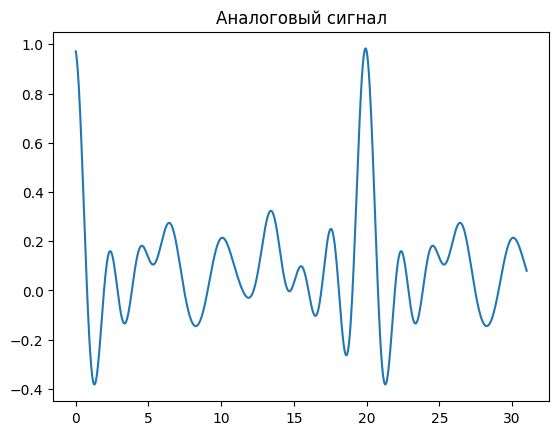

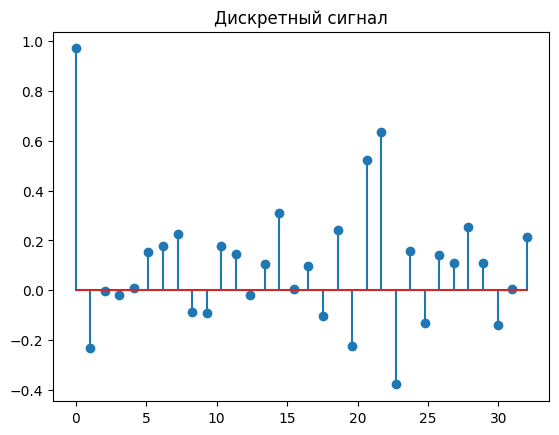

In [226]:
x_an, analog_sig = get_analog_signal(31)
x_dis, discrete_signal = get_discrete_signal(analog_sig)

plot = plt.plot(x_an, analog_sig)
plt.title('Аналоговый сигнал')
plt.show()
plt.stem(x_dis, discrete_signal)
plt.title('Дискретный сигнал')
plt.show()

3. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

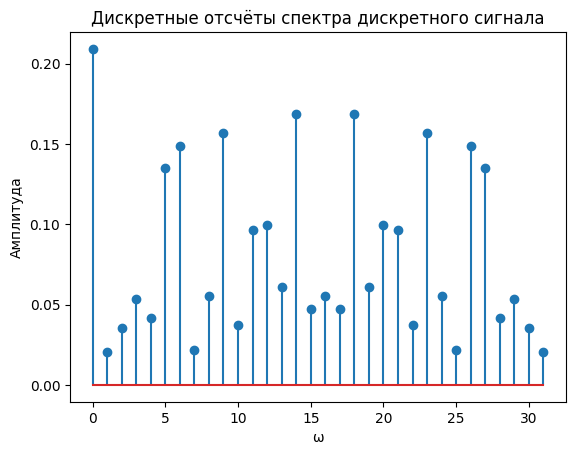

In [227]:
plt.stem(2 * np.abs(fft(discrete_signal)) / 32)
plt.ylabel('Амплитуда')
plt.xlabel('ω')
plt.title('Дискретные отсчёты спектра дискретного сигнала')
plt.show()

4. Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для H(ω) – передаточной функции (частотной характеристики) фильтра.

In [228]:
def smoothing(y, dots):
    return np.convolve(y, np.ones(dots), 'same') / dots

5. Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

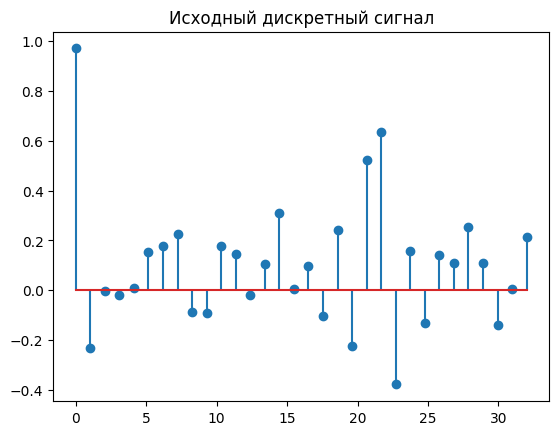

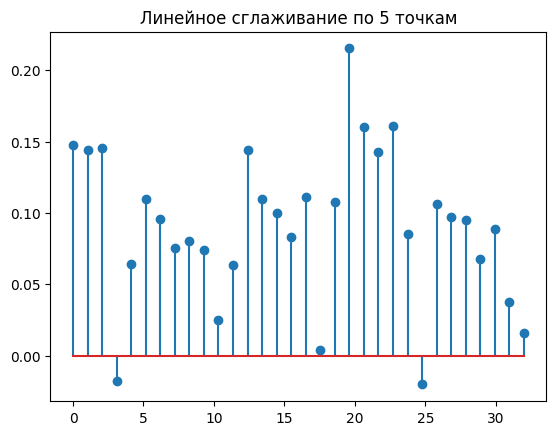

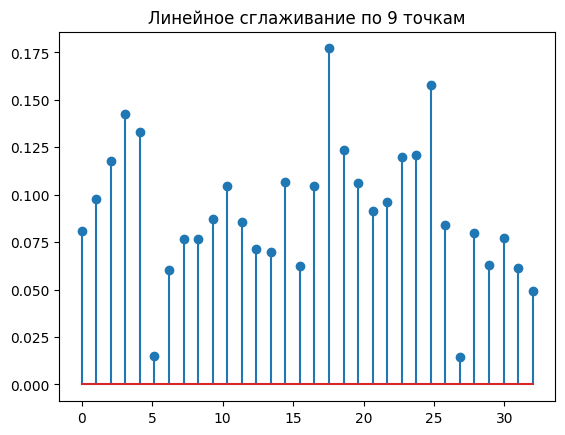

In [229]:
get_stem_plot(x_dis, 'Исходный дискретный сигнал', discrete_signal)
get_stem_plot(x_dis, 'Линейное сглаживание по 5 точкам', smoothing(discrete_signal, 5))
get_stem_plot(x_dis, 'Линейное сглаживание по 9 точкам', smoothing(discrete_signal, 9))

6. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

In [230]:
dfp = 2 * np.abs(fft(discrete_signal)) / 32

dfp_5 = 2 * np.abs(fft(smoothing(discrete_signal, 5))) / 32

dfp_9 = 2 * np.abs(fft(smoothing(discrete_signal, 9))) / 32

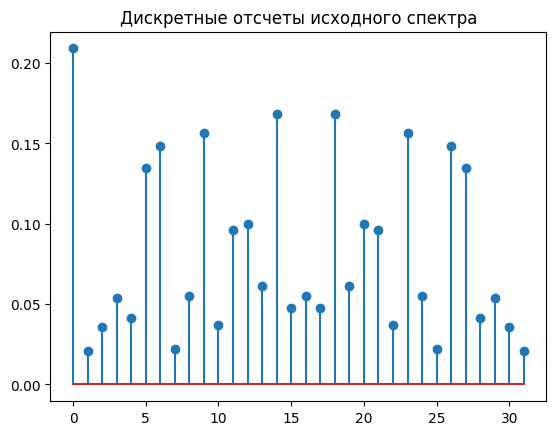

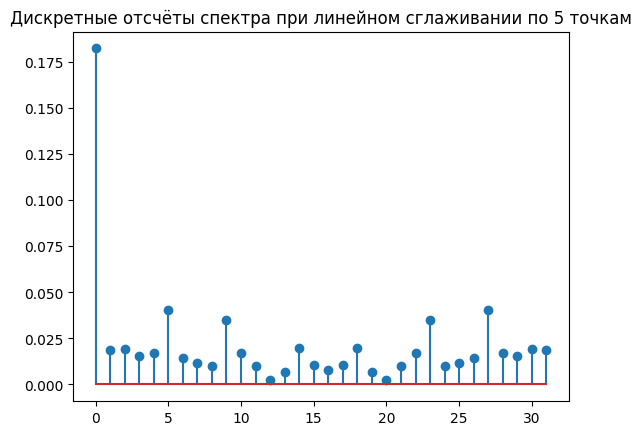

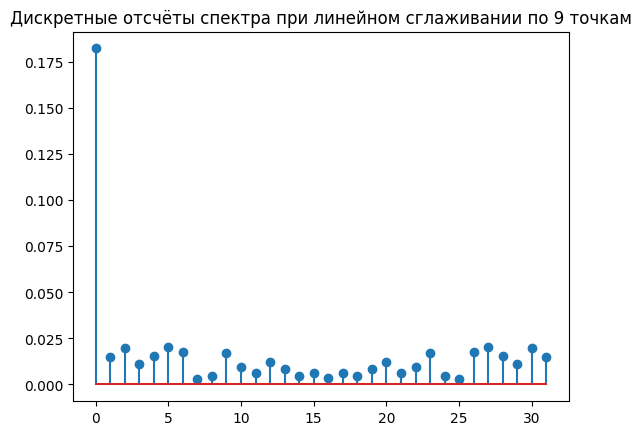

In [231]:
get_stem_plot(dfp, 'Дискретные отсчеты исходного спектра')
get_stem_plot(dfp_5, 'Дискретные отсчёты спектра при линейном сглаживании по 5 точкам')
get_stem_plot(dfp_9, 'Дискретные отсчёты спектра при линейном сглаживании по 9 точкам')

7. Проанализировать результат на соответствие значениям H(ω). Сделать выводы.

In [232]:
def by_points(count, t):
    return (np.sin(count * np.pi * t)) / (count * np.sin(np.pi * t))


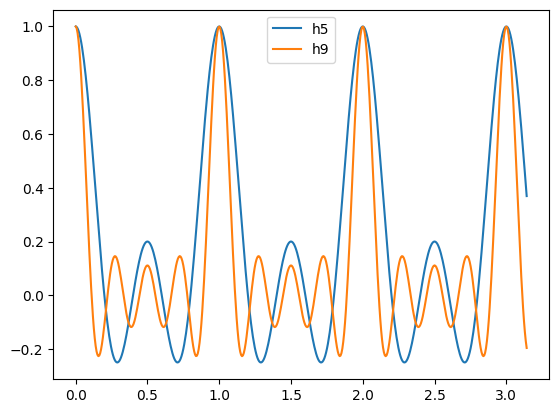

In [233]:
t = np.linspace(0.001, np.pi, 500)

plt.plot(t, by_points(5, t), label="h5")
plt.plot(t, by_points(9, t), label="h9")
plt.legend()

Амплитуда гармоник высоких частот снижена в спектре сглаженного сигнала.

8. Повторить п. 4–7 для следующих фильтров:

    a. Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.

    b. Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).

Передаточная функция дифференцирующего фильтра:

$$\displaystyle H(\omega)=\dfrac{e^{i\omega}-e^{-i\omega}}{2}$$

Формула численного дифференцирования 1-го порядка:

$$\displaystyle y^{'}_n = \dfrac{1}{2}(x_{n+1}-x{n-1})$$

In [234]:
diff_1_smooth = lambda y: 1/2 * np.convolve(y, np.array([-1, 0, 1]), 'same')

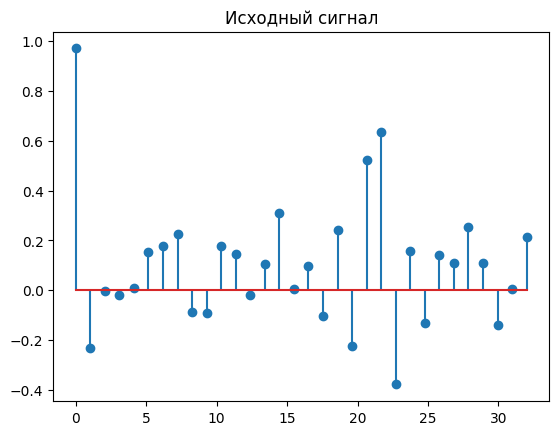

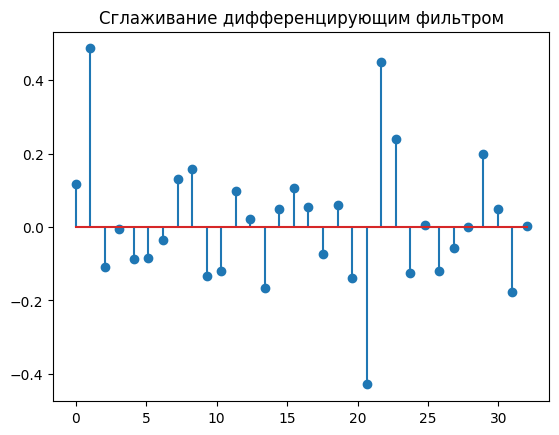

In [235]:
get_stem_plot(x_dis, 'Исходный сигнал', discrete_signal)
get_stem_plot(x_dis, 'Сглаживание дифференцирующим фильтром', diff_1_smooth(discrete_signal))

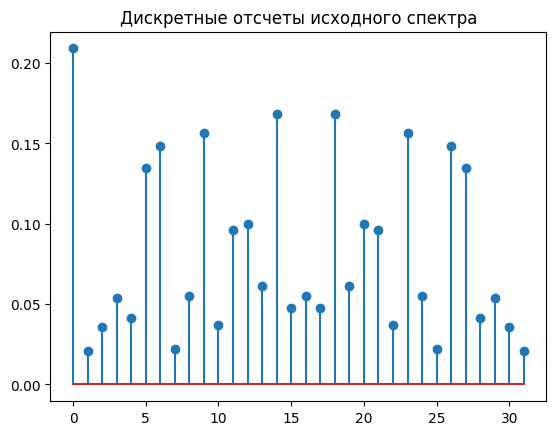

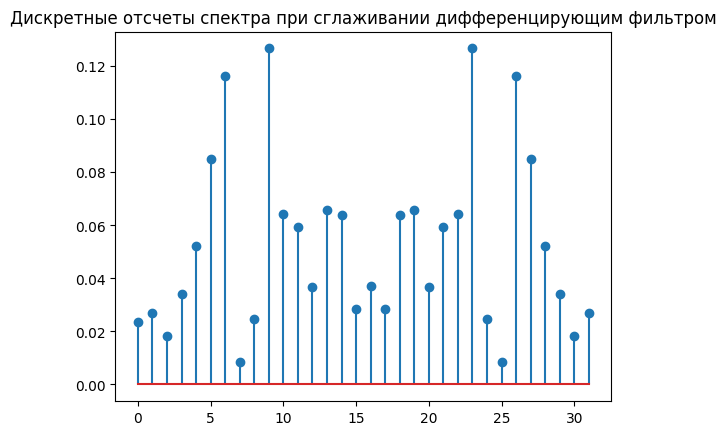

In [236]:
dfp_diff_1 = 2 * np.abs(fft(diff_1_smooth(discrete_signal))) / 32

get_stem_plot(dfp, 'Дискретные отсчеты исходного спектра')

get_stem_plot(dfp_diff_1, 'Дискретные отсчеты спектра при сглаживании дифференцирующим фильтром')

Фильтр, соответствующий дифференцированию 1-го порядка, больше подавляет низкие и высокие частоты.

Ниже представлены передаточные функции для рекурсивных фильтров, соответствующих численному интегрированию.

Для прямоугольников:

$$\displaystyle H(\omega)=\dfrac{e^{\frac{i\omega}{2}}}{e^{i\omega}-1}=\dfrac{1}{2i\cdot sin\big(\frac{\omega}{2}\big)}$$

Для трапеций:

$$\displaystyle H(\omega)=\dfrac{e^{i\omega}+1}{2(e^{i\omega}-1)}=\dfrac{cos\big(\frac{\omega}{2}\big)}{2i\cdot sin\big(\frac{\omega}{2}\big)}$$

Для формул Симпсона:

$$\displaystyle H(\omega)=\dfrac{e^{-i\omega}+4+e^{i\omega}}{3(e^{i\omega}-e^{-i\omega})}=\dfrac{cos(\omega)+2}{3i\cdot sin(\omega)}$$

Определим фильтры, соответствующие интегрированию.

In [237]:
def rectangle(signal):
    s = np.empty(len(signal))
    s[0] = signal[0]
    for i in range(1, len(signal)):
        s[i] = s[i-1] + signal[i-1]
    return s

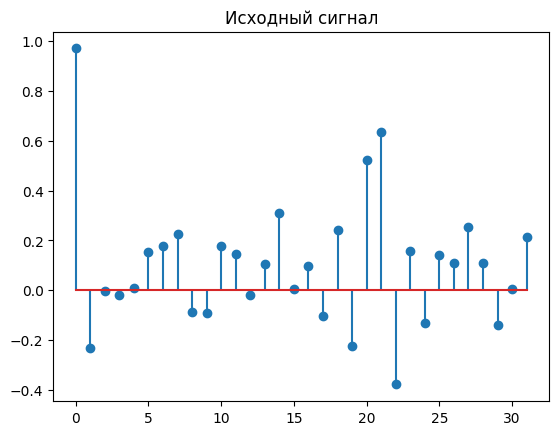

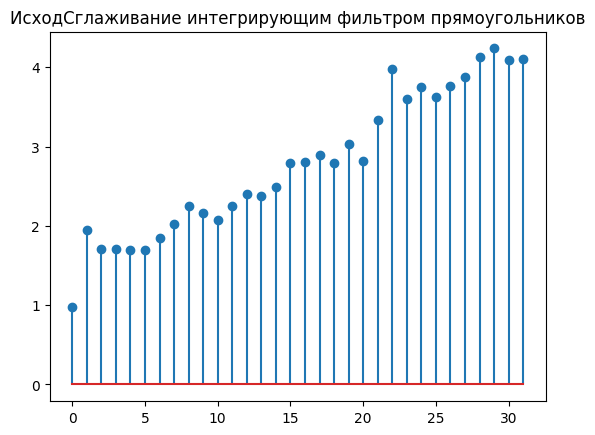

In [238]:
get_stem_plot(discrete_signal, 'Исходный сигнал')
get_stem_plot(rectangle(discrete_signal), 'ИсходСглаживание интегрирующим фильтром прямоугольников')

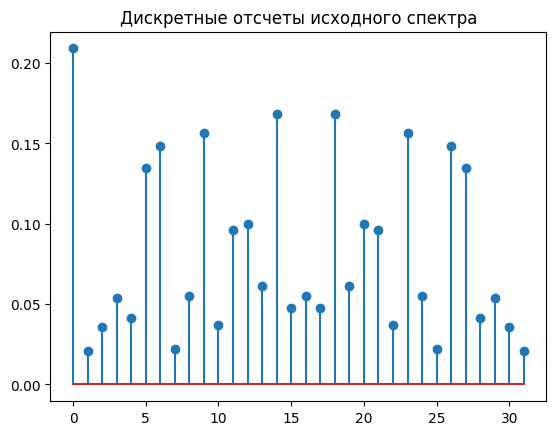

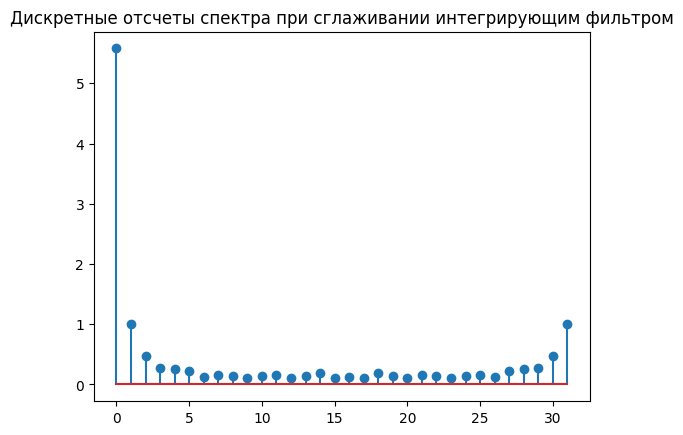

In [239]:
dfp_integ_rect = 2 * np.abs(fft(rectangle(discrete_signal))) / 32

get_stem_plot(dfp, 'Дискретные отсчеты исходного спектра')
get_stem_plot(dfp_integ_rect, 'Дискретные отсчеты спектра при сглаживании интегрирующим фильтром')

In [240]:
def trapezoid(signal):
    s = np.empty(len(signal))
    s[0] = (signal[0] + signal[1]) / 2
    for i in range(1, len(signal)-1):
        s[i] = s[i - 1] + (signal[i] + signal[i+1]) / 2
    return s

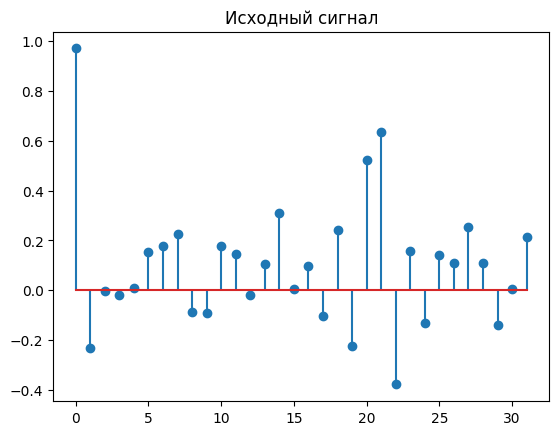

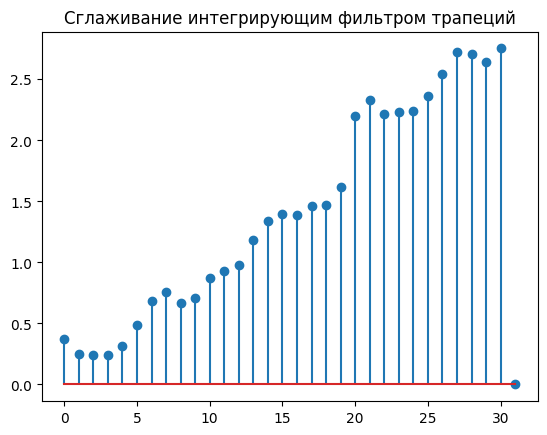

In [241]:
get_stem_plot(discrete_signal, 'Исходный сигнал')
get_stem_plot(trapezoid(discrete_signal), 'Сглаживание интегрирующим фильтром трапеций')

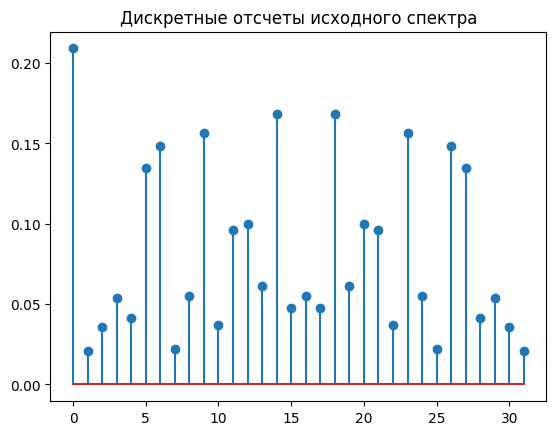

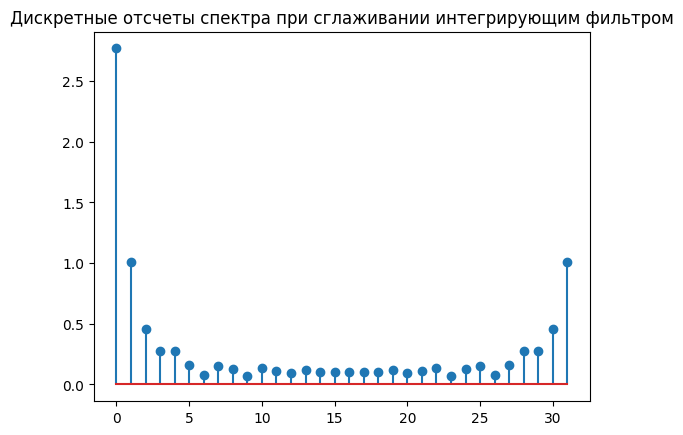

In [242]:
dfp_integ_trap = 2 * np.abs(fft(trapezoid(discrete_signal))) / 32

get_stem_plot(dfp, 'Дискретные отсчеты исходного спектра')

get_stem_plot(dfp_integ_trap, 'Дискретные отсчеты спектра при сглаживании интегрирующим фильтром')

In [243]:
def simpson(signal):
    s = np.empty(len(signal))
    s[0] = (0 + 4 * signal[0] + signal[1]) / 3
    for i in range(1, len(signal)-1):
        s[i] = s[i-1] + (signal[i-1] + signal[i] + 4*signal[i+1]) / 3
    return s

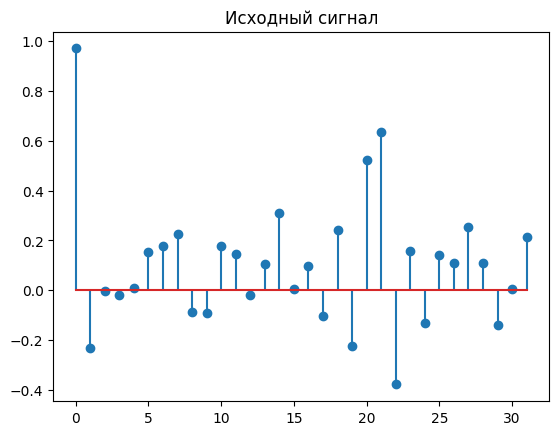

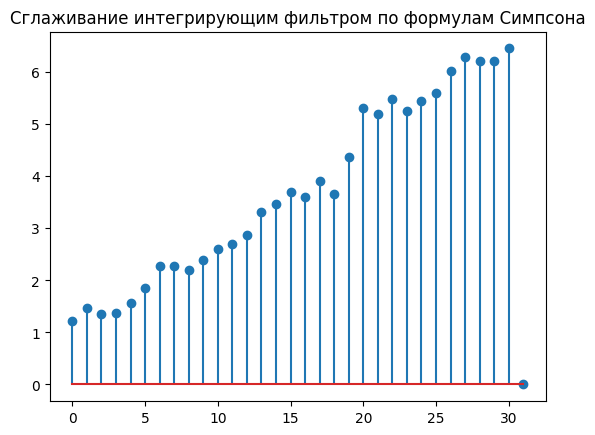

In [244]:
get_stem_plot(discrete_signal, 'Исходный сигнал')
get_stem_plot(simpson(discrete_signal), 'Сглаживание интегрирующим фильтром по формулам Симпсона')

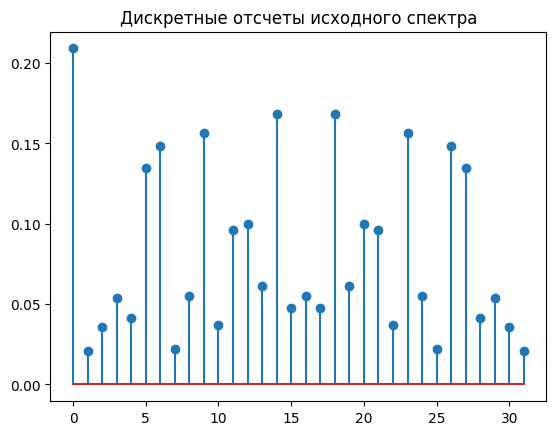

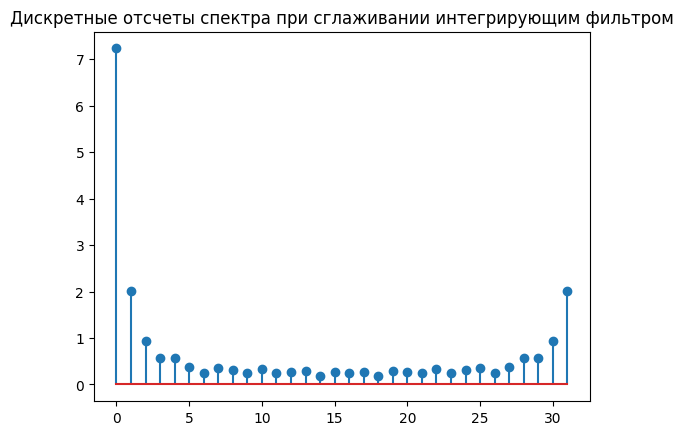

In [245]:
dfp_integ_simp = 2 * np.abs(fft(simpson(discrete_signal))) / 32

get_stem_plot(dfp, 'Дискретные отсчеты исходного спектра')
get_stem_plot(dfp_integ_simp, 'Дискретные отсчеты спектра при сглаживании интегрирующим фильтром')

Отличия сглаживаний интегрированием с помощью различных формул, исходя из спектров:

Сглаживание интегрированием по формулам прямоугольников значительно усиливает низкие частоты в небольшом диапазоне

Сглаживание интегрированием по формулам трапеции усиливает низкие частоты, но в большем диапазоне и с меньшим усилением

Сглаживание интегрированием по формулам Симпсона усиливает весь спектр частот, особенно низкие частоты

## Выводы

В ходе лабораторной работы были получены практические навыки выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также аналази получаемых результатов с помощью дискретного преобразования Фурье (ДПФ). Также были построены соответствующие графики.